In [1]:
from sklearn.datasets import fetch_openml
from keras.utils.np_utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
import time
import matplotlib.pyplot as plt

x, y = fetch_openml('mnist_784', version=1, return_X_y=True)
x = (x/255.).astype('float32')
y = to_categorical(y)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, random_state=42)

(28, 28)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.

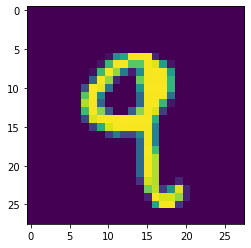

In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
print(np.reshape(x_val[[1090]], (28, 28)).shape)
plt.imshow(np.reshape(x_val[[1090]], (28, 28)))
print(x_val[1090])
print(y_val[1090])

In [3]:
import numpy as np


class NN():
    def __init__(self, input_size, hidden_1_size, hidden_2_size, output_size):
        self.input_data = np.random.randn(1, input_size)
        self.w1 = np.random.randn(input_size, hidden_1_size)
        self.b1 = np.zeros((1, hidden_1_size))
        
        self.w2 = np.random.randn(hidden_1_size, hidden_2_size)
        self.b2 = np.zeros((1, hidden_2_size)) 

        self.w3 = np.random.randn(hidden_2_size, output_size)
        self.b3 = np.zeros((1, output_size))

        self.loss_list = []
        self.accuracy_list = []


    def Sigmoid(self, z):
        return np.clip(1 / (1.0 + np.exp(-z)), 1e-8, 1 - (1e-7))

    def Softmax(self, z):
        z = z - np.max(z)
        return np.exp(z)/np.sum(np.exp(z))

    def Relu(self, z):
        return np.maximum(z, 0)

    def acc_test(self, input):
        tmp_h1 = self.Relu(input.dot(self.w1) + self.b1)
        tmp_h2 = self.Relu(tmp_h1.dot(self.w2) + self.b2)
        tmp_out = self.Softmax(tmp_h2.dot(self.w3) + self.b3)
        return tmp_out

    # Feed Placeholder

    def forward(self, input_data):

        self.input_data = input_data
        self.h1_out = self.Relu(input_data.dot(self.w1) + self.b1)
        self.h2_out = self.Relu(self.h1_out.dot(self.w2) + self.b2)
        self.output_layer = self.Softmax(self.h2_out.dot(self.w3) + self.b3)

    # Backward Propagation

    def backward(self, target):

        # corss_entropy loss derivative
        Loss_to_z_grad = (self.output_layer - target) 

        self.b3_grad = Loss_to_z_grad
        self.w3_grad = self.h2_out.T.dot(Loss_to_z_grad)

        Activation_2＿grad = Loss_to_z_grad.dot(self.w3.T)
        Activation_2_grad[self.h2_out<0] = 0


        self.b2_grad = Activation_2＿grad
        self.w2_grad = self.h1_out.T.dot(Activation_2＿grad)

        
        Activation_1＿grad = Activation_2＿grad.dot(self.w2.T)
        Activation_1_grad[self.h1_out<0] = 0     

        self.b1_grad = Activation_1＿grad
        self.w1_grad = self.input_data.T.dot(Activation_1＿grad)


    # Update Weights
    def update(self, learning_rate=1e-03):
        self.w1 = self.w1 - learning_rate * self.w1_grad
        self.b1 = self.b1 - learning_rate * self.b1_grad

        self.w2 = self.w2 - learning_rate * self.w2_grad
        self.b2 = self.b2 - learning_rate * self.b2_grad

        self.w3 = self.w3 - learning_rate * self.w3_grad
        self.b3 = self.b3 - learning_rate * self.b3_grad

    # Loss Functions
    def cross_entropy(self, Y, Y_prediction):
        return -np.sum(np.multiply(Y, np.log(Y_prediction + 1e-07)))

    def print_accuracy(self):
        correct = 0
        loss = 0
        for i in range(y_train.shape[0]):
            index = self.acc_test(x_train[i])
            one_hot = 0
            for check in range(y_train[i].shape[0]):
                pre = np.argmax(index)
                if y_train[i][check] == 1:
                    one_hot = check
                    break
                loss += self.cross_entropy(index, y_train[i])
            if pre == one_hot:
                correct += 1
        self.loss_list.append(loss/y_train.shape[0])
        self.accuracy_list.append(100*(correct/y_train.shape[0]))
        print('error = ', loss/y_train.shape[0])
        print('accuracy = ', correct/y_train.shape[0])

    def draw_result(self, epoch):
        plt.plot(self.loss_list, '-b', label='loss')
        plt.plot(self.accuracy_list, '-r', label='accuracy')

        plt.xlabel("n iteration")
        plt.legend(loc='upper left')
        plt.title('mnist')

        plt.show()


------------------------ epoch:  0
error =  17.38084103709196
accuracy =  0.6948235294117647


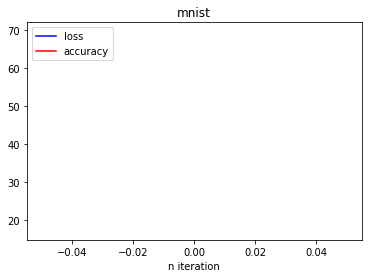

--------------------------------
------------------------ epoch:  1
error =  16.162607994559835
accuracy =  0.7968571428571428


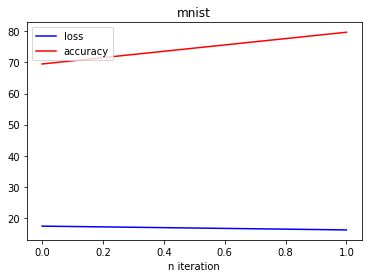

--------------------------------
------------------------ epoch:  2
error =  20.74986897153824
accuracy =  0.7470420168067227


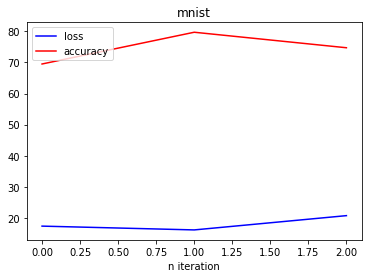

--------------------------------
------------------------ epoch:  3
error =  16.192530795695173
accuracy =  0.7924873949579831


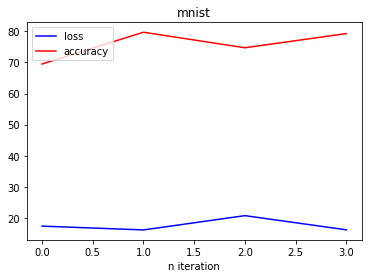

--------------------------------
------------------------ epoch:  4
error =  13.47539147867875
accuracy =  0.8171260504201681


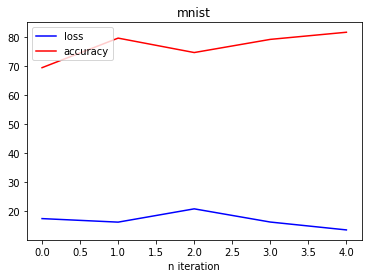

--------------------------------
------------------------ epoch:  5
error =  14.75140869102615
accuracy =  0.8027731092436975


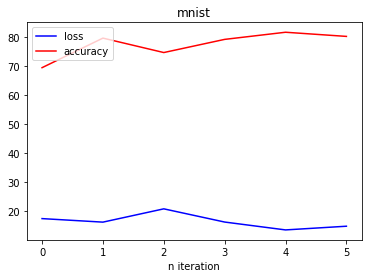

--------------------------------
------------------------ epoch:  6
error =  17.512839112122407
accuracy =  0.7921008403361345


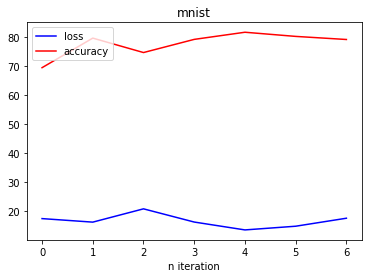

--------------------------------
------------------------ epoch:  7
error =  13.181526064139977
accuracy =  0.8442521008403361


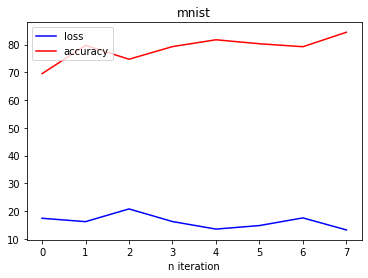

--------------------------------
------------------------ epoch:  8
error =  14.52785121042583
accuracy =  0.8470084033613445


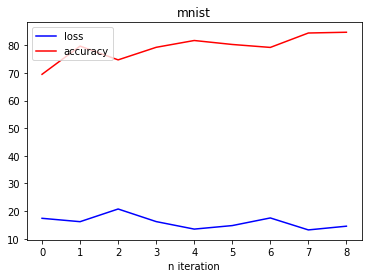

--------------------------------
------------------------ epoch:  9
error =  10.679818620629288
accuracy =  0.8548067226890756


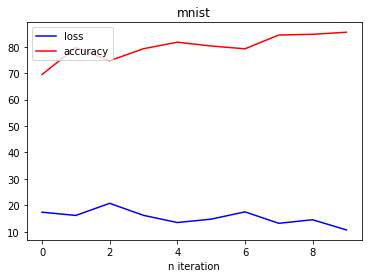

--------------------------------
------------------------ epoch:  10
error =  16.38739206940055
accuracy =  0.806453781512605


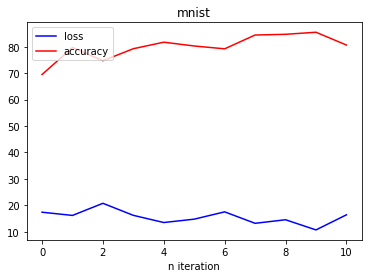

--------------------------------
------------------------ epoch:  11
error =  11.713067702625972
accuracy =  0.8508235294117648


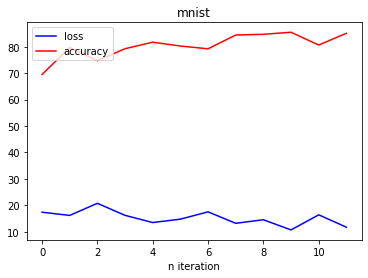

--------------------------------
------------------------ epoch:  12
error =  11.806824487522597
accuracy =  0.861563025210084


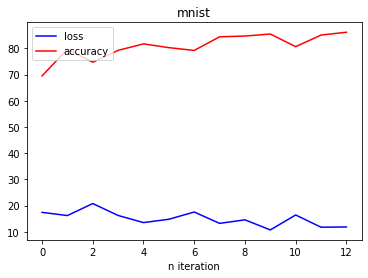

--------------------------------
------------------------ epoch:  13
error =  13.08481160876989
accuracy =  0.846655462184874


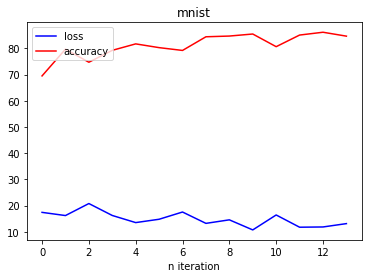

--------------------------------
------------------------ epoch:  14
error =  15.016170387116873
accuracy =  0.8363193277310924


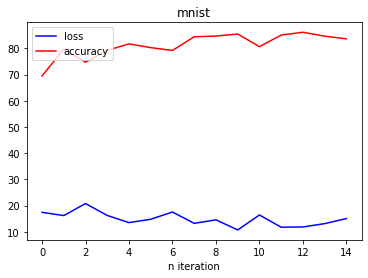

--------------------------------
------------------------ epoch:  15
error =  11.85237414882456
accuracy =  0.8665714285714285


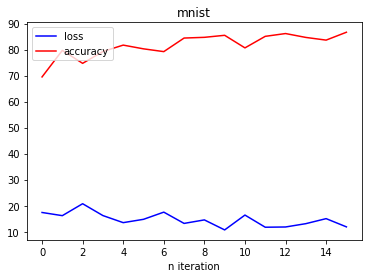

--------------------------------
------------------------ epoch:  16
error =  14.155090427577255
accuracy =  0.8481512605042016


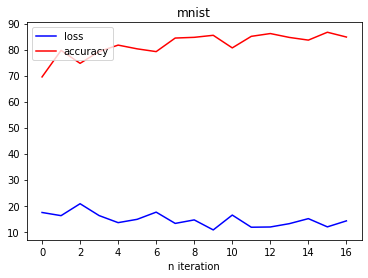

--------------------------------
------------------------ epoch:  17
error =  12.075852546068669
accuracy =  0.8508571428571429


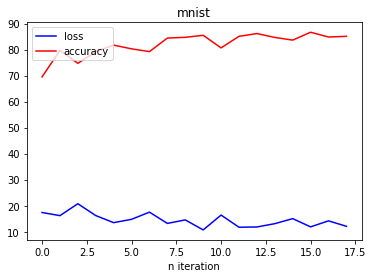

--------------------------------
------------------------ epoch:  18
error =  12.914226861680124
accuracy =  0.8620168067226891


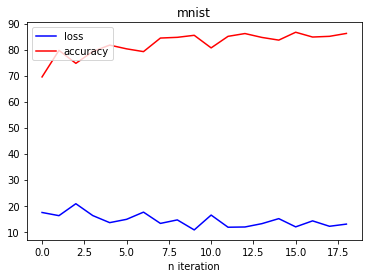

--------------------------------
------------------------ epoch:  19
error =  11.000374468484255
accuracy =  0.861764705882353


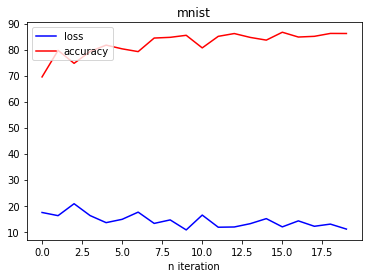

--------------------------------


In [4]:
 import random
 mnist_nn = NN(input_size = 784, hidden_1_size = 300, hidden_2_size = 200,output_size = 10)


 
for i in range(20):
    for j in range(1000):
        index = random.randint(0,x_train.shape[0])-1
        mnist_nn.forward(x_train[[index]])
        mnist_nn.backward(y_train[index])
        mnist_nn.update()
    print('------------------------ epoch: ', i)
    mnist_nn.print_accuracy()
    mnist_nn.draw_result(i)
    print('--------------------------------')





